In [2]:
import numpy as np
import pandas as pd
import sklearn.linear_model as linear_model

In [3]:
file_path=r"C:\Users\achin\Downloads\training_data.csv"
training_data=pd.read_csv(file_path)
print(training_data.head())

   hour_of_day  day_of_week  month  holiday  weekday  summertime  temp   dew  \
0            5            5      1        0        0           0  -7.2 -15.0   
1           21            4      1        0        1           0  -1.3 -12.8   
2           21            3      8        0        1           1  26.9  21.8   
3            1            6      1        0        0           0   3.1  -4.0   
4           17            0      3        0        1           0  11.7 -11.4   

   humidity  precip  snow  snowdepth  windspeed  cloudcover  visibility  \
0     53.68     0.0     0        0.0       16.3        31.6        16.0   
1     40.97     0.0     0        0.0       23.9        85.7        16.0   
2     73.39     0.0     0        0.0        0.0        81.1        16.0   
3     59.74     0.0     0        0.0       19.2         0.0        16.0   
4     18.71     0.0     0        0.0       10.5        44.6        16.0   

    increase_stock  
0  low_bike_demand  
1  low_bike_demand  
2  lo

In [4]:
training_data.sample(10) #ramdomly selected data rows

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
460,4,2,11,0,1,0,4.6,2.0,82.69,0.000,0,0.0,8.7,44.6,16.0,low_bike_demand
1588,14,4,4,0,1,1,11.6,3.2,56.36,0.011,0,0.0,14.2,91.1,16.0,high_bike_demand
24,23,0,7,0,1,1,23.7,21.1,85.64,0.000,0,0.0,7.3,81.1,15.9,low_bike_demand
819,0,3,4,0,1,1,10.4,2.8,58.97,0.000,0,0.0,24.8,79.3,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0,low_bike_demand
166,19,3,5,0,1,1,28.7,10.2,31.61,0.000,0,0.0,14.3,44.6,16.0,high_bike_demand
76,11,6,8,0,0,1,29.2,22.8,68.43,0.000,0,0.0,21.9,79.3,16.0,high_bike_demand
226,4,0,9,0,1,1,22.7,20.0,84.79,0.000,0,0.0,5.2,55.3,16.0,low_bike_demand
298,19,4,5,0,1,1,28.8,12.8,37.29,0.000,0,0.0,27.9,0.0,16.0,low_bike_demand
1382,0,6,6,0,0,1,25.4,21.1,76.77,0.000,0,0.0,24.7,79.3,16.0,low_bike_demand


In [5]:
training_data.shape #how many observations and features in data

(1600, 16)

In [6]:
training_data.dtypes #what is data type of each feature

hour_of_day         int64
day_of_week         int64
month               int64
holiday             int64
weekday             int64
summertime          int64
temp              float64
dew               float64
humidity          float64
precip            float64
snow                int64
snowdepth         float64
windspeed         float64
cloudcover        float64
visibility        float64
increase_stock     object
dtype: object

In [7]:
training_data.select_dtypes(include=['number']).columns.tolist() #how many numerical features

['hour_of_day',
 'day_of_week',
 'month',
 'holiday',
 'weekday',
 'summertime',
 'temp',
 'dew',
 'humidity',
 'precip',
 'snow',
 'snowdepth',
 'windspeed',
 'cloudcover',
 'visibility']

In [8]:
training_data.select_dtypes(include=['object']).columns.tolist() #how many categorical features

['increase_stock']

In [9]:
from sklearn.preprocessing import LabelEncoder #lable encode output variable

le = LabelEncoder()
training_data['increase_stock'] = le.fit_transform(training_data['increase_stock'])
training_data.sample(10)

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
1176,10,1,11,0,1,0,11.5,7.7,77.42,0.0,0,0.00,0.4,24.4,16.0,1
754,13,3,11,0,1,1,11.0,-2.7,38.05,0.0,0,0.00,0.5,91.1,16.0,1
778,10,2,8,0,1,1,21.6,17.9,79.56,0.0,0,0.00,0.6,55.5,16.0,1
1586,0,0,11,0,1,0,8.2,0.6,58.86,0.0,0,0.00,12.5,92.8,16.0,1
1091,9,6,7,0,0,1,23.2,17.9,71.83,0.0,0,0.00,12.5,48.4,16.0,1
1342,4,6,9,0,0,1,18.0,14.2,78.77,0.0,0,0.00,7.1,0.0,16.0,1
297,13,2,2,0,1,0,5.0,-3.8,52.78,0.0,0,0.01,5.1,94.3,16.0,1
96,11,0,3,0,1,1,9.3,-3.4,40.59,0.0,0,0.00,24.9,24.4,16.0,1
769,0,5,9,0,0,1,19.6,14.8,73.67,0.0,0,0.00,6.7,24.4,16.0,1
723,4,5,10,0,0,1,8.0,5.5,84.05,0.0,0,0.00,0.0,25.3,16.0,1


In [10]:
training_data.describe()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,11.37125,3.022500,6.468750,0.033125,0.710000,0.64375,15.210313,7.750750,63.927844,0.122042,0.0,0.042713,13.082500,64.322375,15.344125,0.820000
std,6.94837,2.012965,3.454741,0.179019,0.453904,0.47904,9.264785,10.026459,19.079419,0.920600,0.0,0.421198,7.756652,32.748869,2.323737,0.384308
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000,-9.100000,-18.400000,15.850000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000,0.000000
25%,5.00000,1.000000,3.000000,0.000000,0.000000,0.00000,7.700000,-0.800000,47.845000,0.000000,0.0,0.000000,7.500000,28.800000,16.000000,1.000000
50%,12.00000,3.000000,6.000000,0.000000,1.000000,1.00000,15.500000,8.300000,65.175000,0.000000,0.0,0.000000,12.300000,79.300000,16.000000,1.000000
75%,17.00000,5.000000,9.000000,0.000000,1.000000,1.00000,23.200000,16.800000,79.955000,0.000000,0.0,0.000000,17.600000,92.800000,16.000000,1.000000
max,23.00000,6.000000,12.000000,1.000000,1.000000,1.00000,35.600000,24.300000,99.890000,25.871000,0.0,6.710000,43.800000,100.000000,16.000000,1.000000


In [11]:
training_data.isnull().sum() #minssing values in data

hour_of_day       0
day_of_week       0
month             0
holiday           0
weekday           0
summertime        0
temp              0
dew               0
humidity          0
precip            0
snow              0
snowdepth         0
windspeed         0
cloudcover        0
visibility        0
increase_stock    0
dtype: int64

In [12]:
training_data.nunique() #how many unique values in data

hour_of_day         24
day_of_week          7
month               12
holiday              2
weekday              2
summertime           2
temp               343
dew                313
humidity          1431
precip             126
snow                 1
snowdepth           41
windspeed          281
cloudcover         232
visibility          83
increase_stock       2
dtype: int64

In [13]:
training_data.duplicated().sum() # duplicated obsdervations

0

In [14]:
training_data.corr()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
hour_of_day,1.000000,-0.005963,-0.016503,0.012732,-0.028899,0.005376,0.157994,-0.023067,-0.325988,-0.008747,NaN,-0.006031,0.161313,0.002672,0.012115,-0.240544
day_of_week,-0.005963,1.000000,-0.032363,-0.128759,-0.786150,0.010263,0.003727,0.014271,0.016976,-0.011158,NaN,-0.045930,0.033726,0.043354,-0.018810,-0.083688
month,-0.016503,-0.032363,1.000000,-0.016021,0.049254,0.046929,0.207436,0.272927,0.173159,0.004232,NaN,-0.127751,-0.207056,-0.083544,0.028287,-0.037212
holiday,0.012732,-0.128759,-0.016021,1.000000,0.118294,-0.132132,-0.055069,-0.060239,-0.017260,-0.005564,NaN,-0.013385,-0.019129,0.014093,-0.028171,0.004909
weekday,-0.028899,-0.786150,0.049254,0.118294,1.000000,-0.023872,0.007433,0.009804,0.016758,0.029214,NaN,0.024333,-0.024126,0.008788,-0.011815,0.116446
summertime,0.005376,0.010263,0.046929,-0.132132,-0.023872,1.000000,0.707637,0.645944,0.064755,0.012930,NaN,-0.127991,-0.028827,-0.022964,0.068963,-0.216052
temp,0.157994,0.003727,0.207436,-0.055069,0.007433,0.707637,1.000000,0.871536,0.008306,-0.003313,NaN,-0.153692,-0.037656,-0.012421,0.119909,-0.336981
dew,-0.023067,0.014271,0.272927,-0.060239,0.009804,0.645944,0.871536,1.000000,0.489590,0.071566,NaN,-0.119660,-0.190793,0.146844,-0.050474,-0.132663
humidity,-0.325988,0.016976,0.173159,-0.017260,0.016758,0.064755,0.008306,0.489590,1.000000,0.174768,NaN,0.033598,-0.340557,0.331976,-0.376796,0.308726
precip,-0.008747,-0.011158,0.004232,-0.005564,0.029214,0.012930,-0.003313,0.071566,0.174768,1.000000,NaN,0.011242,0.060778,0.126660,-0.455058,0.059304


In [15]:
training_data.corr()['increase_stock']

hour_of_day      -0.240544
day_of_week      -0.083688
month            -0.037212
holiday           0.004909
weekday           0.116446
summertime       -0.216052
temp             -0.336981
dew              -0.132663
humidity          0.308726
precip            0.059304
snow                   NaN
snowdepth         0.047526
windspeed        -0.096011
cloudcover        0.045534
visibility       -0.113443
increase_stock    1.000000
Name: increase_stock, dtype: float64

In [16]:
lr=linear_model.LinearRegression()
lr.fit(X=training_data[["humidity","snow","windspeed"]],y=training_data["increase_stock"])

LinearRegression()

In [17]:
lr.intercept_

0.4112425488249698

In [18]:
lr.coef_

array([0.00628936, 0.        , 0.00051156])

In [19]:
hour_of_day_hat=lr.predict(X=training_data[["humidity","snow","windspeed"]])
np.mean((hour_of_day_hat-training_data["hour_of_day"])**2) #mean square error

160.12701049144442

In [20]:
lr.fit(X=training_data[["humidity","snow","windspeed","cloudcover","visibility"]],y=training_data["hour_of_day"])
hour_of_day_hat2=lr.predict(X=training_data[["humidity","snow","windspeed","cloudcover","visibility"]])
np.mean((hour_of_day_hat2-training_data["hour_of_day"])**2)

41.920909658811816

In [21]:
import matplotlib.pyplot as plt
pd.DataFrame(training_data.increase_stock.value_counts())


,count
increase_stock,
1,1312
0,288


(array([ 288.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1312.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

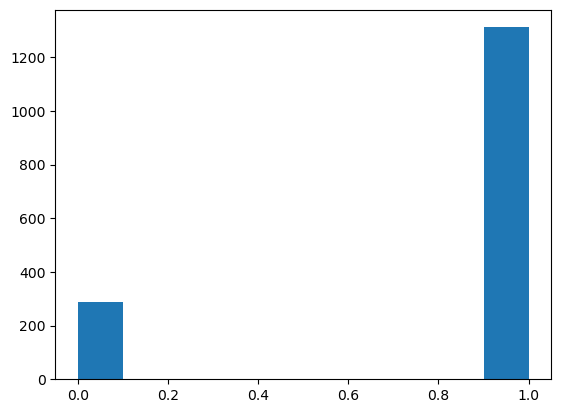

In [22]:
plt.hist(training_data.increase_stock)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


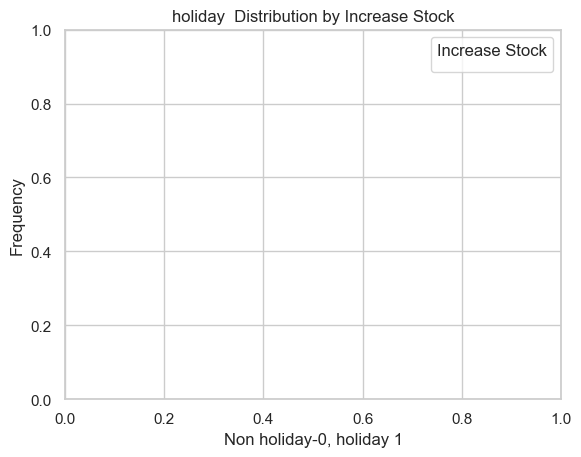

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
Holiday = training_data['holiday']
increase_stock_categories = training_data['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'holiday': Holiday, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='holiday', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='holiday', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Non holiday-0, holiday 1')
plt.ylabel('Frequency')
plt.title('holiday  Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


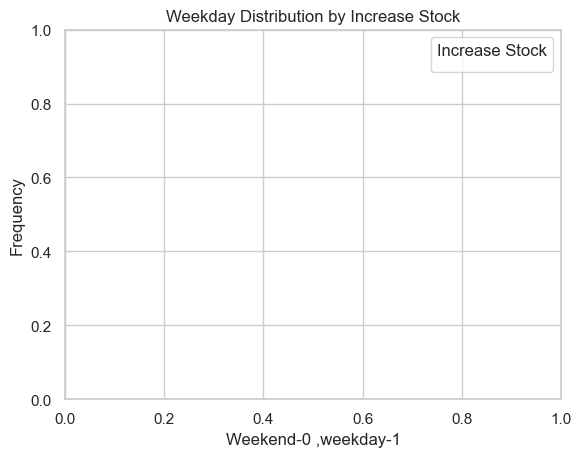

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
Weekday = training_data['weekday']
increase_stock_categories = training_data['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'weekday': Weekday, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='weekday', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='weekday', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Weekend-0 ,weekday-1')
plt.ylabel('Frequency')
plt.title('Weekday Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


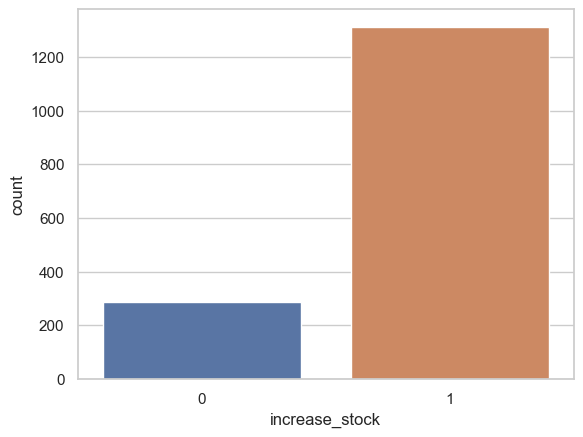

C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


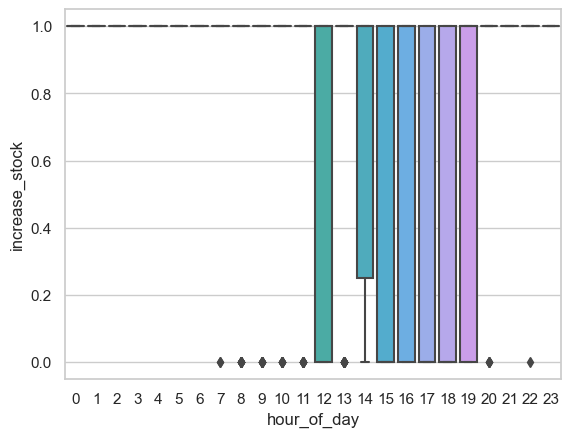

C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

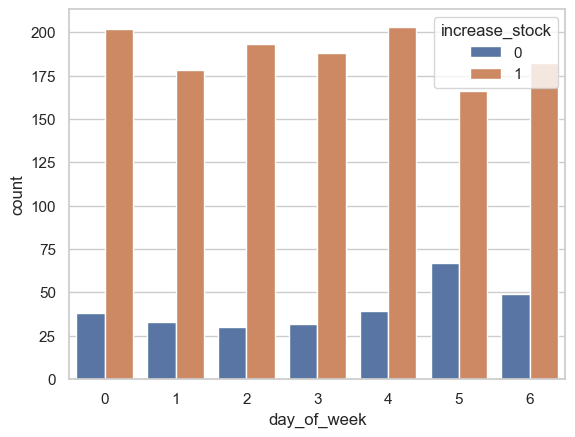

C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

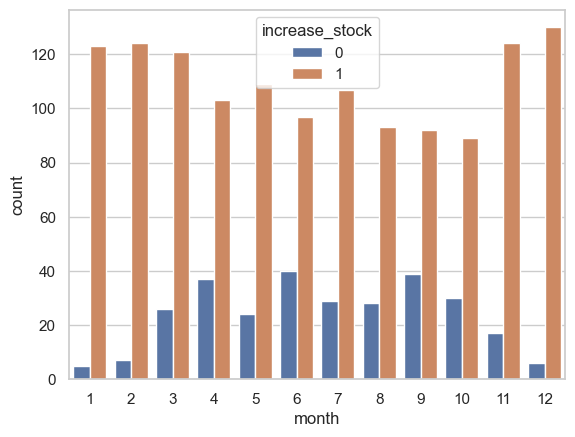

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bike demand distribution
sns.countplot(x='increase_stock', data=training_data)
plt.show()

# Bike demand by hour_of_day
sns.boxplot(x='hour_of_day', y='increase_stock', data=training_data)
plt.show()

# Bike demand by day_of_week
sns.countplot(x='day_of_week', hue='increase_stock', data=training_data)
plt.show()

# Bike demand by month
sns.countplot(x='month', hue='increase_stock', data=training_data)
plt.show()

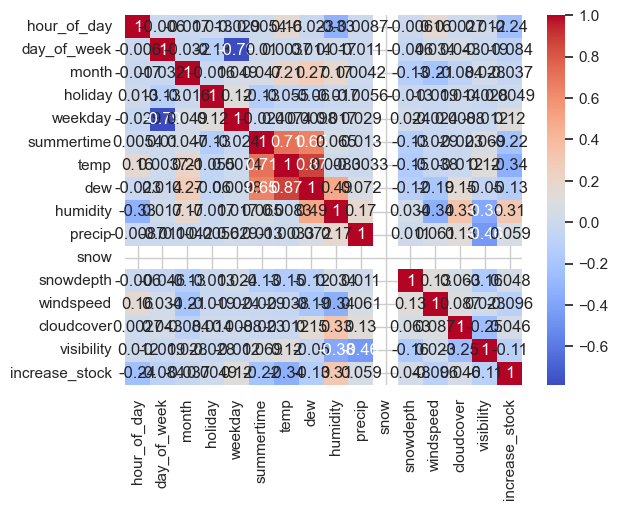

In [26]:
correlation_matrix = training_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

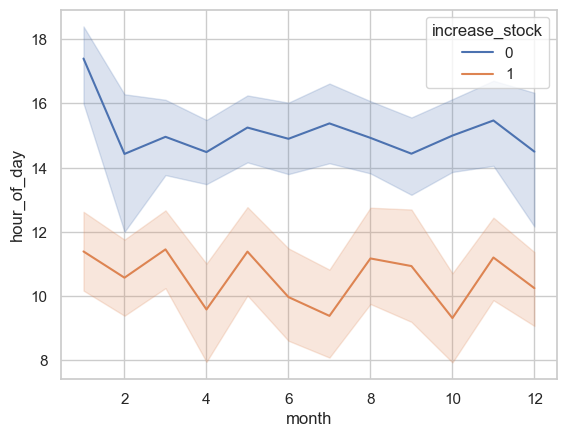

C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

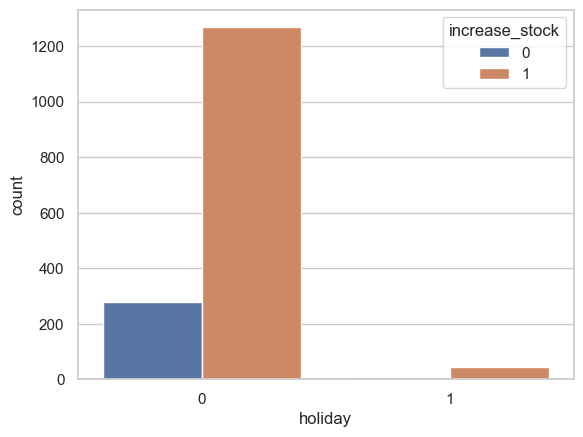

C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

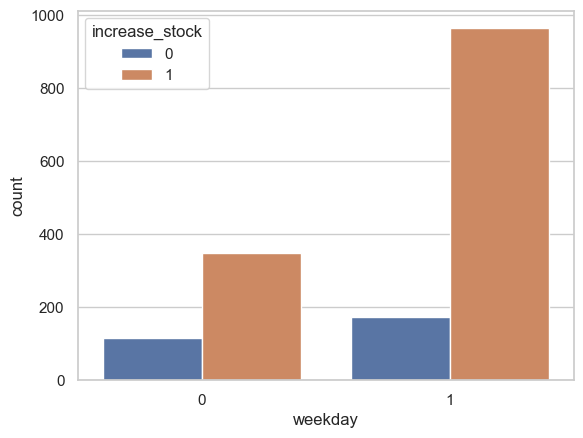

In [27]:
# Seasonal patterns in bike demand
sns.lineplot(x='month', y='hour_of_day', hue='increase_stock', data=training_data)
plt.show()

# Impact of holidays and weekdays
sns.countplot(x='holiday', hue='increase_stock', data=training_data)
plt.show()

sns.countplot(x='weekday', hue='increase_stock', data=training_data)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
df=training_data
# Assume 'X' contains features and 'y' contains the target variable 'increase_stock'
X = df.drop('increase_stock', axis=1)
y = df['increase_stock']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a RandomForestClassifier (you can use other classifiers)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.884375
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63        50
           1       0.93      0.93      0.93       270

    accuracy                           0.88       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.88      0.88      0.88       320



In [29]:
# Detect anomalies using z-score
from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include=['float64']))
anomalies = (z_scores > 3) | (z_scores < -3)

# Display rows with anomalies
print(df[anomalies.any(axis=1)])

      hour_of_day  day_of_week  month  holiday  weekday  summertime  temp  \
73              5            4      3        0        1           1   9.2   
102            20            3      3        0        1           1  11.0   
133            18            1      8        0        1           1  28.0   
135             8            3      9        0        1           1  24.3   
151             9            5      3        0        0           0   3.8   
...           ...          ...    ...      ...      ...         ...   ...   
1486            9            2      2        0        1           0  -0.8   
1498           16            5     10        0        0           1  18.3   
1533           10            4      2        0        1           0  11.8   
1564            8            1     11        0        1           1  14.3   
1597           13            0      3        0        1           1  13.9   

       dew  humidity  precip  snow  snowdepth  windspeed  cloudcover  \
73 

In [30]:
import pandas as pd

# Assuming your data is in a DataFrame named 'df'
summertime_stats = df.groupby('summertime')['increase_stock'].describe()
print(summertime_stats)

             count      mean       std  min  25%  50%  75%  max
summertime                                                     
0            570.0  0.931579  0.252689  0.0  1.0  1.0  1.0  1.0
1           1030.0  0.758252  0.428350  0.0  1.0  1.0  1.0  1.0


Descriptive Statistics for Windspeed:
count    1600.000000
mean       13.082500
std         7.756652
min         0.000000
25%         7.500000
50%        12.300000
75%        17.600000
max        43.800000
Name: windspeed, dtype: float64


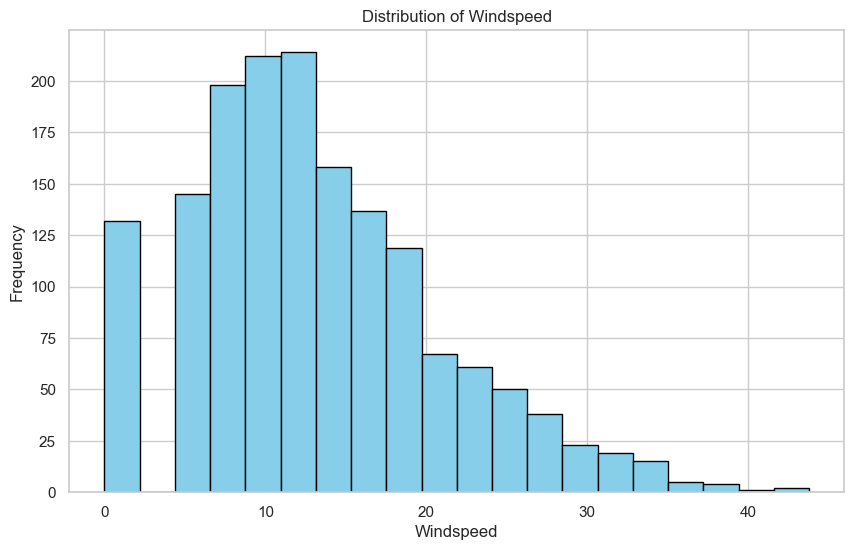

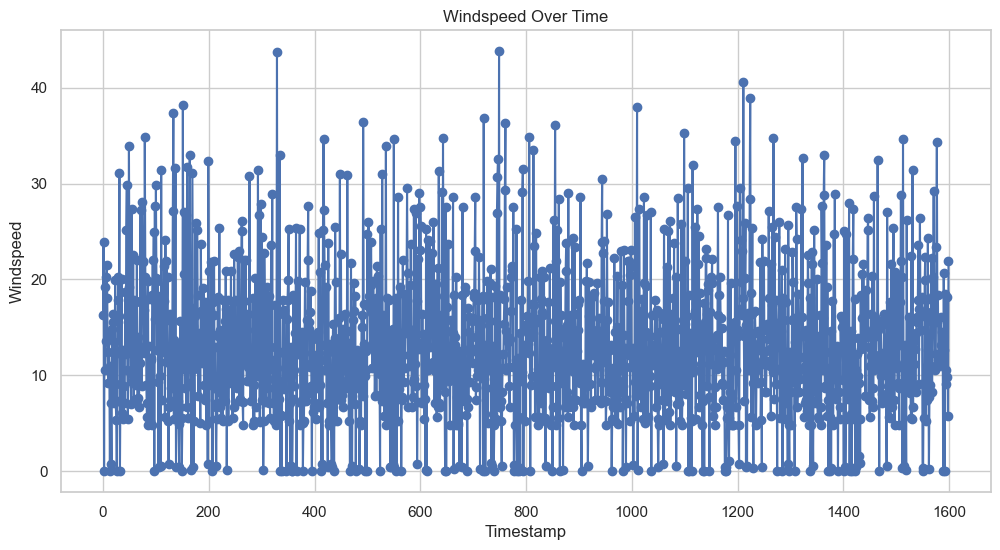


Correlations with Windspeed:
windspeed         1.000000
hour_of_day       0.161313
snowdepth         0.126995
cloudcover        0.087295
precip            0.060778
day_of_week       0.033726
visibility        0.023009
holiday          -0.019129
weekday          -0.024126
summertime       -0.028827
temp             -0.037656
increase_stock   -0.096011
dew              -0.190793
month            -0.207056
humidity         -0.340557
snow                   NaN
Name: windspeed, dtype: float64


In [31]:
print("Descriptive Statistics for Windspeed:")
print(df['windspeed'].describe())

# Plot a histogram of windspeed
plt.figure(figsize=(10, 6))
plt.hist(df['windspeed'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.show()



plt.figure(figsize=(12, 6))
plt.plot(df['windspeed'], marker='o', linestyle='-')
plt.title('Windspeed Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Windspeed')
plt.grid(True)
plt.show()

# Correlation analysis with other variables
correlation_matrix = df.corr()
windspeed_correlations = correlation_matrix['windspeed'].sort_values(ascending=False)
print("\nCorrelations with Windspeed:")
print(windspeed_correlations)


In [32]:
Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Select rows where windspeed is an outlier
outliers = df[(df['windspeed'] < lower_bound) | (df['windspeed'] > upper_bound)]

# Display the identified outliers
print("Identified Outliers for Windspeed:")
print(outliers[['windspeed']])

Identified Outliers for Windspeed:
      windspeed
49         33.9
79         34.8
133        37.4
151        38.2
164        33.0
329        43.7
334        33.0
417        34.6
492        36.4
535        33.9
550        34.6
643        34.7
720        36.8
749        43.8
761        36.3
806        34.9
814        33.5
855        36.1
1010       38.0
1099       35.3
1196       34.4
1211       40.6
1224       38.9
1268       34.7
1364       33.0
1513       34.6
1577       34.3


C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


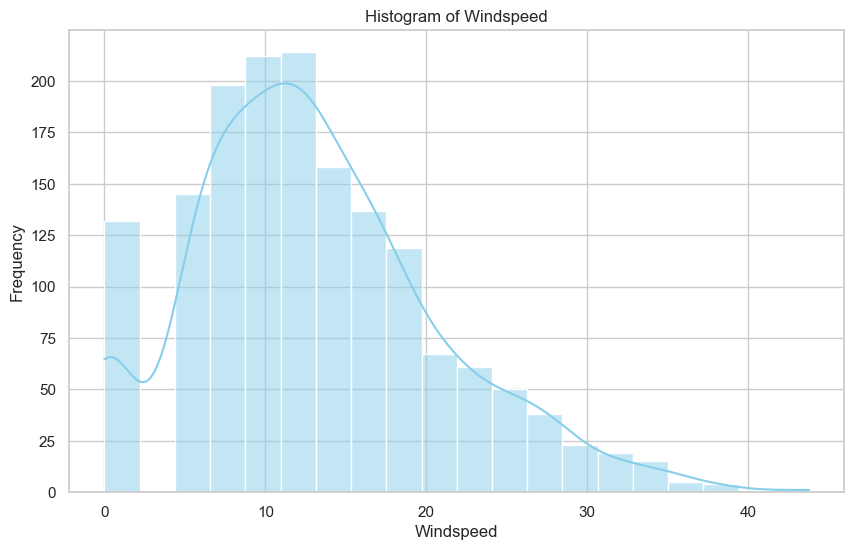

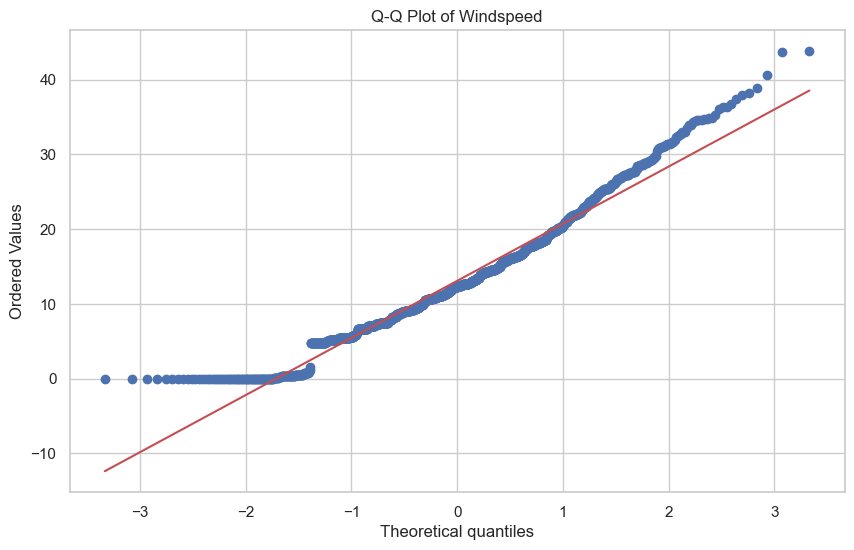

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Assuming your DataFrame is named 'df'
# Adjust 'windspeed' with the actual column name in your dataset

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['windspeed'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.show()

# Create a probability plot (Q-Q plot)
plt.figure(figsize=(10, 6))
probplot(df['windspeed'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Windspeed')
plt.show()

In [34]:
skewness = df['windspeed'].skew()
print(f"Skewness of Windspeed: {skewness}")

Skewness of Windspeed: 0.6326674982857798


In [35]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Select the columns you want to check for outliers (numerical columns)
numerical_columns = ['hour_of_day', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility']

# Function to detect outliers using IQR method for each feature
def find_outliers_iqr(data, columns):
    outliers_per_feature = {}
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_per_feature[column] = list(data[(data[column] < lower_bound) | (data[column] > upper_bound)].index)
    return outliers_per_feature

# Find outliers using IQR method for each feature
outliers_iqr_per_feature = find_outliers_iqr(df, numerical_columns)

# Display the outliers for each feature
for column, outliers in outliers_iqr_per_feature.items():
    print(f"Outliers for {column}:", outliers)
    print(f"Count of outliers for {column}:", len(outliers))

Outliers for hour_of_day: []
Count of outliers for hour_of_day: 0
Outliers for temp: []
Count of outliers for temp: 0
Outliers for dew: []
Count of outliers for dew: 0
Outliers for humidity: []
Count of outliers for humidity: 0
Outliers for precip: [51, 80, 81, 109, 135, 140, 141, 147, 148, 156, 177, 189, 198, 201, 209, 212, 217, 221, 222, 235, 246, 257, 267, 273, 278, 281, 306, 401, 421, 436, 439, 440, 468, 471, 493, 498, 569, 572, 573, 579, 580, 586, 592, 597, 610, 614, 661, 680, 685, 692, 703, 719, 726, 737, 743, 762, 788, 797, 802, 805, 841, 852, 854, 863, 872, 877, 880, 883, 888, 894, 900, 908, 910, 921, 925, 933, 935, 938, 953, 967, 970, 976, 984, 995, 996, 998, 1004, 1022, 1023, 1032, 1039, 1050, 1069, 1077, 1094, 1099, 1129, 1145, 1149, 1154, 1156, 1159, 1164, 1168, 1171, 1188, 1195, 1201, 1208, 1218, 1223, 1233, 1261, 1283, 1284, 1296, 1306, 1309, 1318, 1328, 1332, 1347, 1349, 1357, 1366, 1369, 1370, 1393, 1403, 1408, 1413, 1414, 1421, 1426, 1427, 1429, 1437, 1440, 1442, 1450,

C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


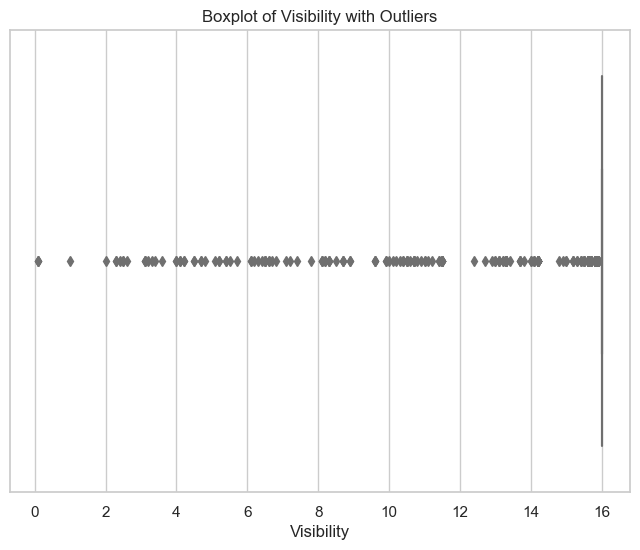

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Adjust 'visibility' with the actual column name in your dataset

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a boxplot for visibility
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['visibility'], color='skyblue')

# Set the title and labels
plt.title('Boxplot of Visibility with Outliers')
plt.xlabel('Visibility')
plt.show()


C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


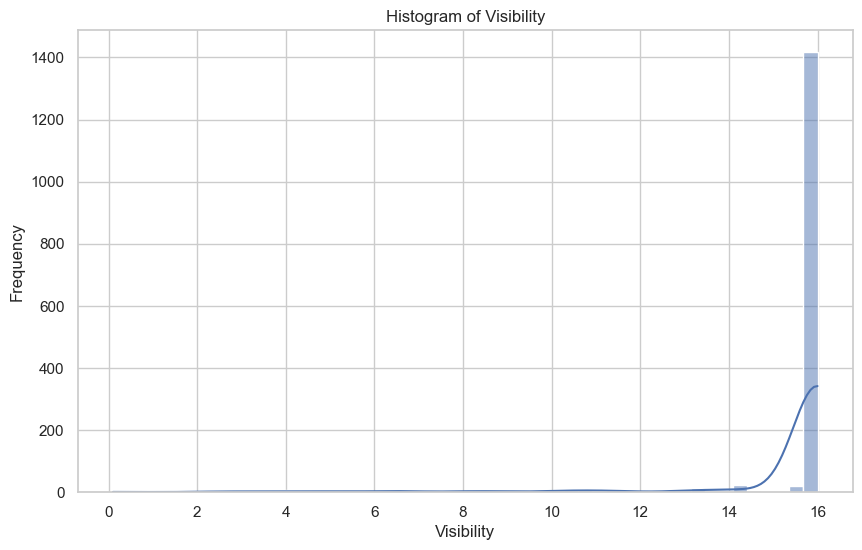

In [37]:
# Create a histogram for visibility
plt.figure(figsize=(10, 6))
sns.histplot(df['visibility'], bins=50, kde=True)

# Set the title and labels
plt.title('Histogram of Visibility')
plt.xlabel('Visibility')
plt.ylabel('Frequency')
plt.show()

In [38]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Calculate the range for each column
range_per_column = df.agg(['min', 'max', 'ptp']).transpose()

# Display the result
print("Range of Values (Min, Max, Range) per Column:")
print(range_per_column)

Range of Values (Min, Max, Range) per Column:
                  min      max      ptp
hour_of_day      0.00   23.000   23.000
day_of_week      0.00    6.000    6.000
month            1.00   12.000   11.000
holiday          0.00    1.000    1.000
weekday          0.00    1.000    1.000
summertime       0.00    1.000    1.000
temp            -9.10   35.600   44.700
dew            -18.40   24.300   42.700
humidity        15.85   99.890   84.040
precip           0.00   25.871   25.871
snow             0.00    0.000    0.000
snowdepth        0.00    6.710    6.710
windspeed        0.00   43.800   43.800
cloudcover       0.00  100.000  100.000
visibility       0.10   16.000   15.900
increase_stock   0.00    1.000    1.000


In [39]:
import statsmodels.api as sm

# Specify parameters
confidence_level = 0.95
margin_of_error = 0.05
population_std_dev = 10  # Replace with your estimate
population_size = 1600  # Replace with the actual population size

# Calculate sample size
z_score = sm.stats.norm.ppf(1 - (1 - confidence_level) / 2)
sample_size = ((z_score ** 2) * (population_std_dev ** 2)) / (margin_of_error ** 2)
sample_size_finite_population = (sample_size * (population_size - sample_size)) / (population_size - 1)

print(f"Required Sample Size: {sample_size:.2f} (without finite population correction)")
print(f"Required Sample Size with Finite Population Correction: {sample_size_finite_population:.2f}")

AttributeError: module 'statsmodels.stats.api' has no attribute 'norm'

In [ ]:
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame and 'excluded_columns' are the columns to exclude
excluded_columns = [7, 10]  # Replace with the actual indices of columns to exclude

# Create a list of all column indices
all_columns = list(df.columns)

# Remove the excluded columns
included_columns = [col for col in all_columns if col not in excluded_columns]

# Set the random seed for reproducibility
np.random.seed(1)

# Randomly sample indices for training
trainIndex = np.random.choice(df.index, size=800, replace=False)

# Create the training set
train = df.loc[trainIndex, included_columns]

# Create the testing set by excluding the training indices
test = df.loc[~df.index.isin(trainIndex), included_columns]

C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\achin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

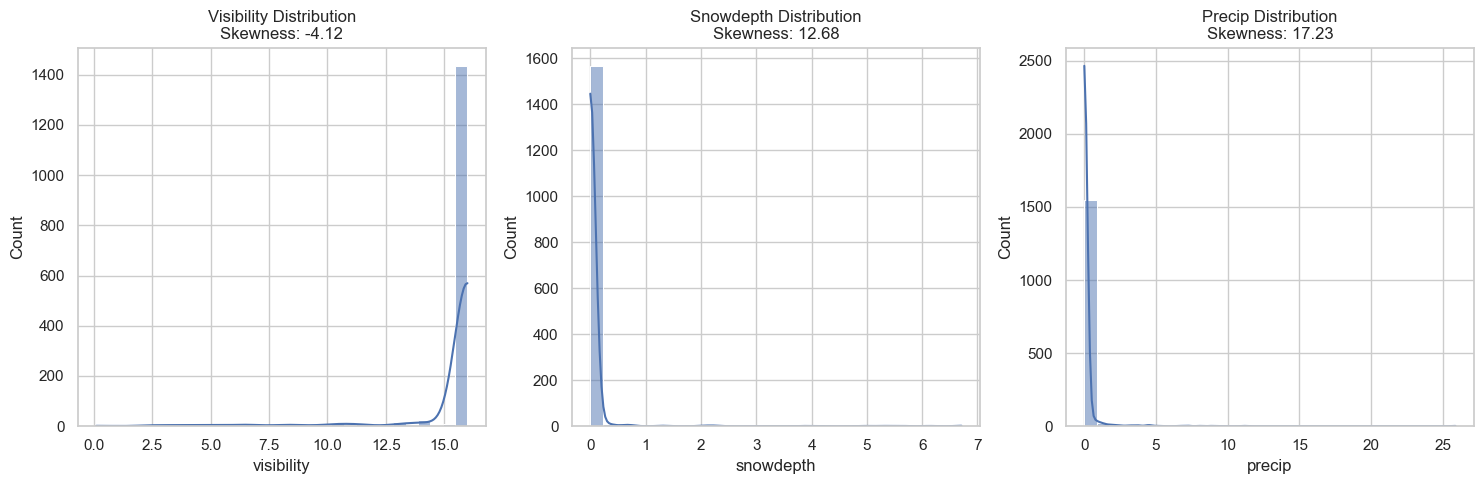

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns of interest
columns_of_interest = ['visibility', 'snowdepth', 'precip']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

# Iterate through columns and create histograms with skewness info
for i, column in enumerate(columns_of_interest):
    sns.histplot(df[column], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'{column.capitalize()} Distribution\nSkewness: {df[column].skew():.2f}')

# Adjust layout
plt.tight_layout()
plt.show()


In [41]:
# Features of interest
features_of_interest = ['visibility', 'precip', 'snowdepth','windspeed']

for feature in features_of_interest:
    # Find outliers using the IQR method for the specified feature
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Extract the outliers for the specified feature
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]

    # Calculate the range of values for outliers
    outlier_range = outliers.max() - outliers.min()
    min_outlier_value = outliers.min()
    max_outlier_value =outliers.max()
    
    print(f"Range of values for outliers in {feature}: {outlier_range}")
    print(f"Minimum value of outliers in {feature}: {min_outlier_value}")
    print(f"Maximum value of outliers in {feature}: {max_outlier_value}")

Range of values for outliers in visibility: 15.8
Minimum value of outliers in visibility: 0.1
Maximum value of outliers in visibility: 15.9
Range of values for outliers in precip: 25.865
Minimum value of outliers in precip: 0.006
Maximum value of outliers in precip: 25.871
Range of values for outliers in snowdepth: 6.7
Minimum value of outliers in snowdepth: 0.01
Maximum value of outliers in snowdepth: 6.71
Range of values for outliers in windspeed: 10.799999999999997
Minimum value of outliers in windspeed: 33.0
Maximum value of outliers in windspeed: 43.8


In [42]:
df


,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0,1
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0,1
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0,1
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0,1
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0,1
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4,1
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0,1
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0,0


In [43]:
df.drop(columns=['dew','snow'],inplace=True)

In [44]:
df

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,53.68,0.000,0.0,16.3,31.6,16.0,1
1,21,4,1,0,1,0,-1.3,40.97,0.000,0.0,23.9,85.7,16.0,1
2,21,3,8,0,1,1,26.9,73.39,0.000,0.0,0.0,81.1,16.0,1
3,1,6,1,0,0,0,3.1,59.74,0.000,0.0,19.2,0.0,16.0,1
4,17,0,3,0,1,0,11.7,18.71,0.000,0.0,10.5,44.6,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,87.68,0.000,0.0,10.6,24.4,16.0,1
1596,14,0,6,0,1,1,23.2,82.43,2.217,0.0,9.8,92.1,10.4,1
1597,13,0,3,0,1,1,13.9,32.93,0.000,2.0,18.2,79.3,16.0,1
1598,14,5,3,0,0,1,11.7,22.09,0.000,0.0,5.8,24.4,16.0,0


In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'df' is your dataset with features and 'increased_stock' as the target variable

X = df.drop('increase_stock', axis=1)
y = df['increase_stock']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data only to avoid data leakage
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the balanced dataset

# Optionally, you can concatenate the resampled data back together
df_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=X.columns), pd.DataFrame(y_train_resampled, columns=['increase_stock'])], axis=1)
X_train_resampled.shape, y_train_resampled.shape

((2084, 13), (2084,))

In [51]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X_smote' is the feature matrix after SMOTE
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_train_resampled)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_train_resampled, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9400479616306955
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       208
           1       0.95      0.93      0.94       209

    accuracy                           0.94       417
   macro avg       0.94      0.94      0.94       417
weighted avg       0.94      0.94      0.94       417

